### Import libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

### Loading Dataset

In [39]:
data = pd.read_csv('car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [40]:
data.shape

(301, 9)

### Data Cleaning

In [41]:
data.columns=data.columns.str.lower()

In [42]:
data.isnull().sum()

car_name         0
year             0
selling_price    0
present_price    0
driven_kms       0
fuel_type        0
selling_type     0
transmission     0
owner            0
dtype: int64

In [43]:
data.duplicated().sum()

np.int64(2)

In [44]:
data.drop_duplicates(inplace= True)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   car_name       299 non-null    object 
 1   year           299 non-null    int64  
 2   selling_price  299 non-null    float64
 3   present_price  299 non-null    float64
 4   driven_kms     299 non-null    int64  
 5   fuel_type      299 non-null    object 
 6   selling_type   299 non-null    object 
 7   transmission   299 non-null    object 
 8   owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


In [46]:
numerical_columns=data.select_dtypes(['int', 'float']).columns

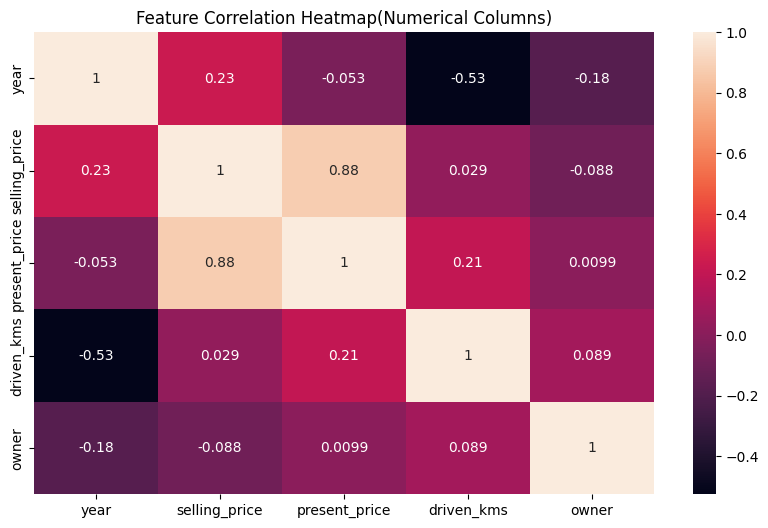

In [47]:
numerical_df = data[numerical_columns]
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Feature Correlation Heatmap(Numerical Columns)')
plt.show()


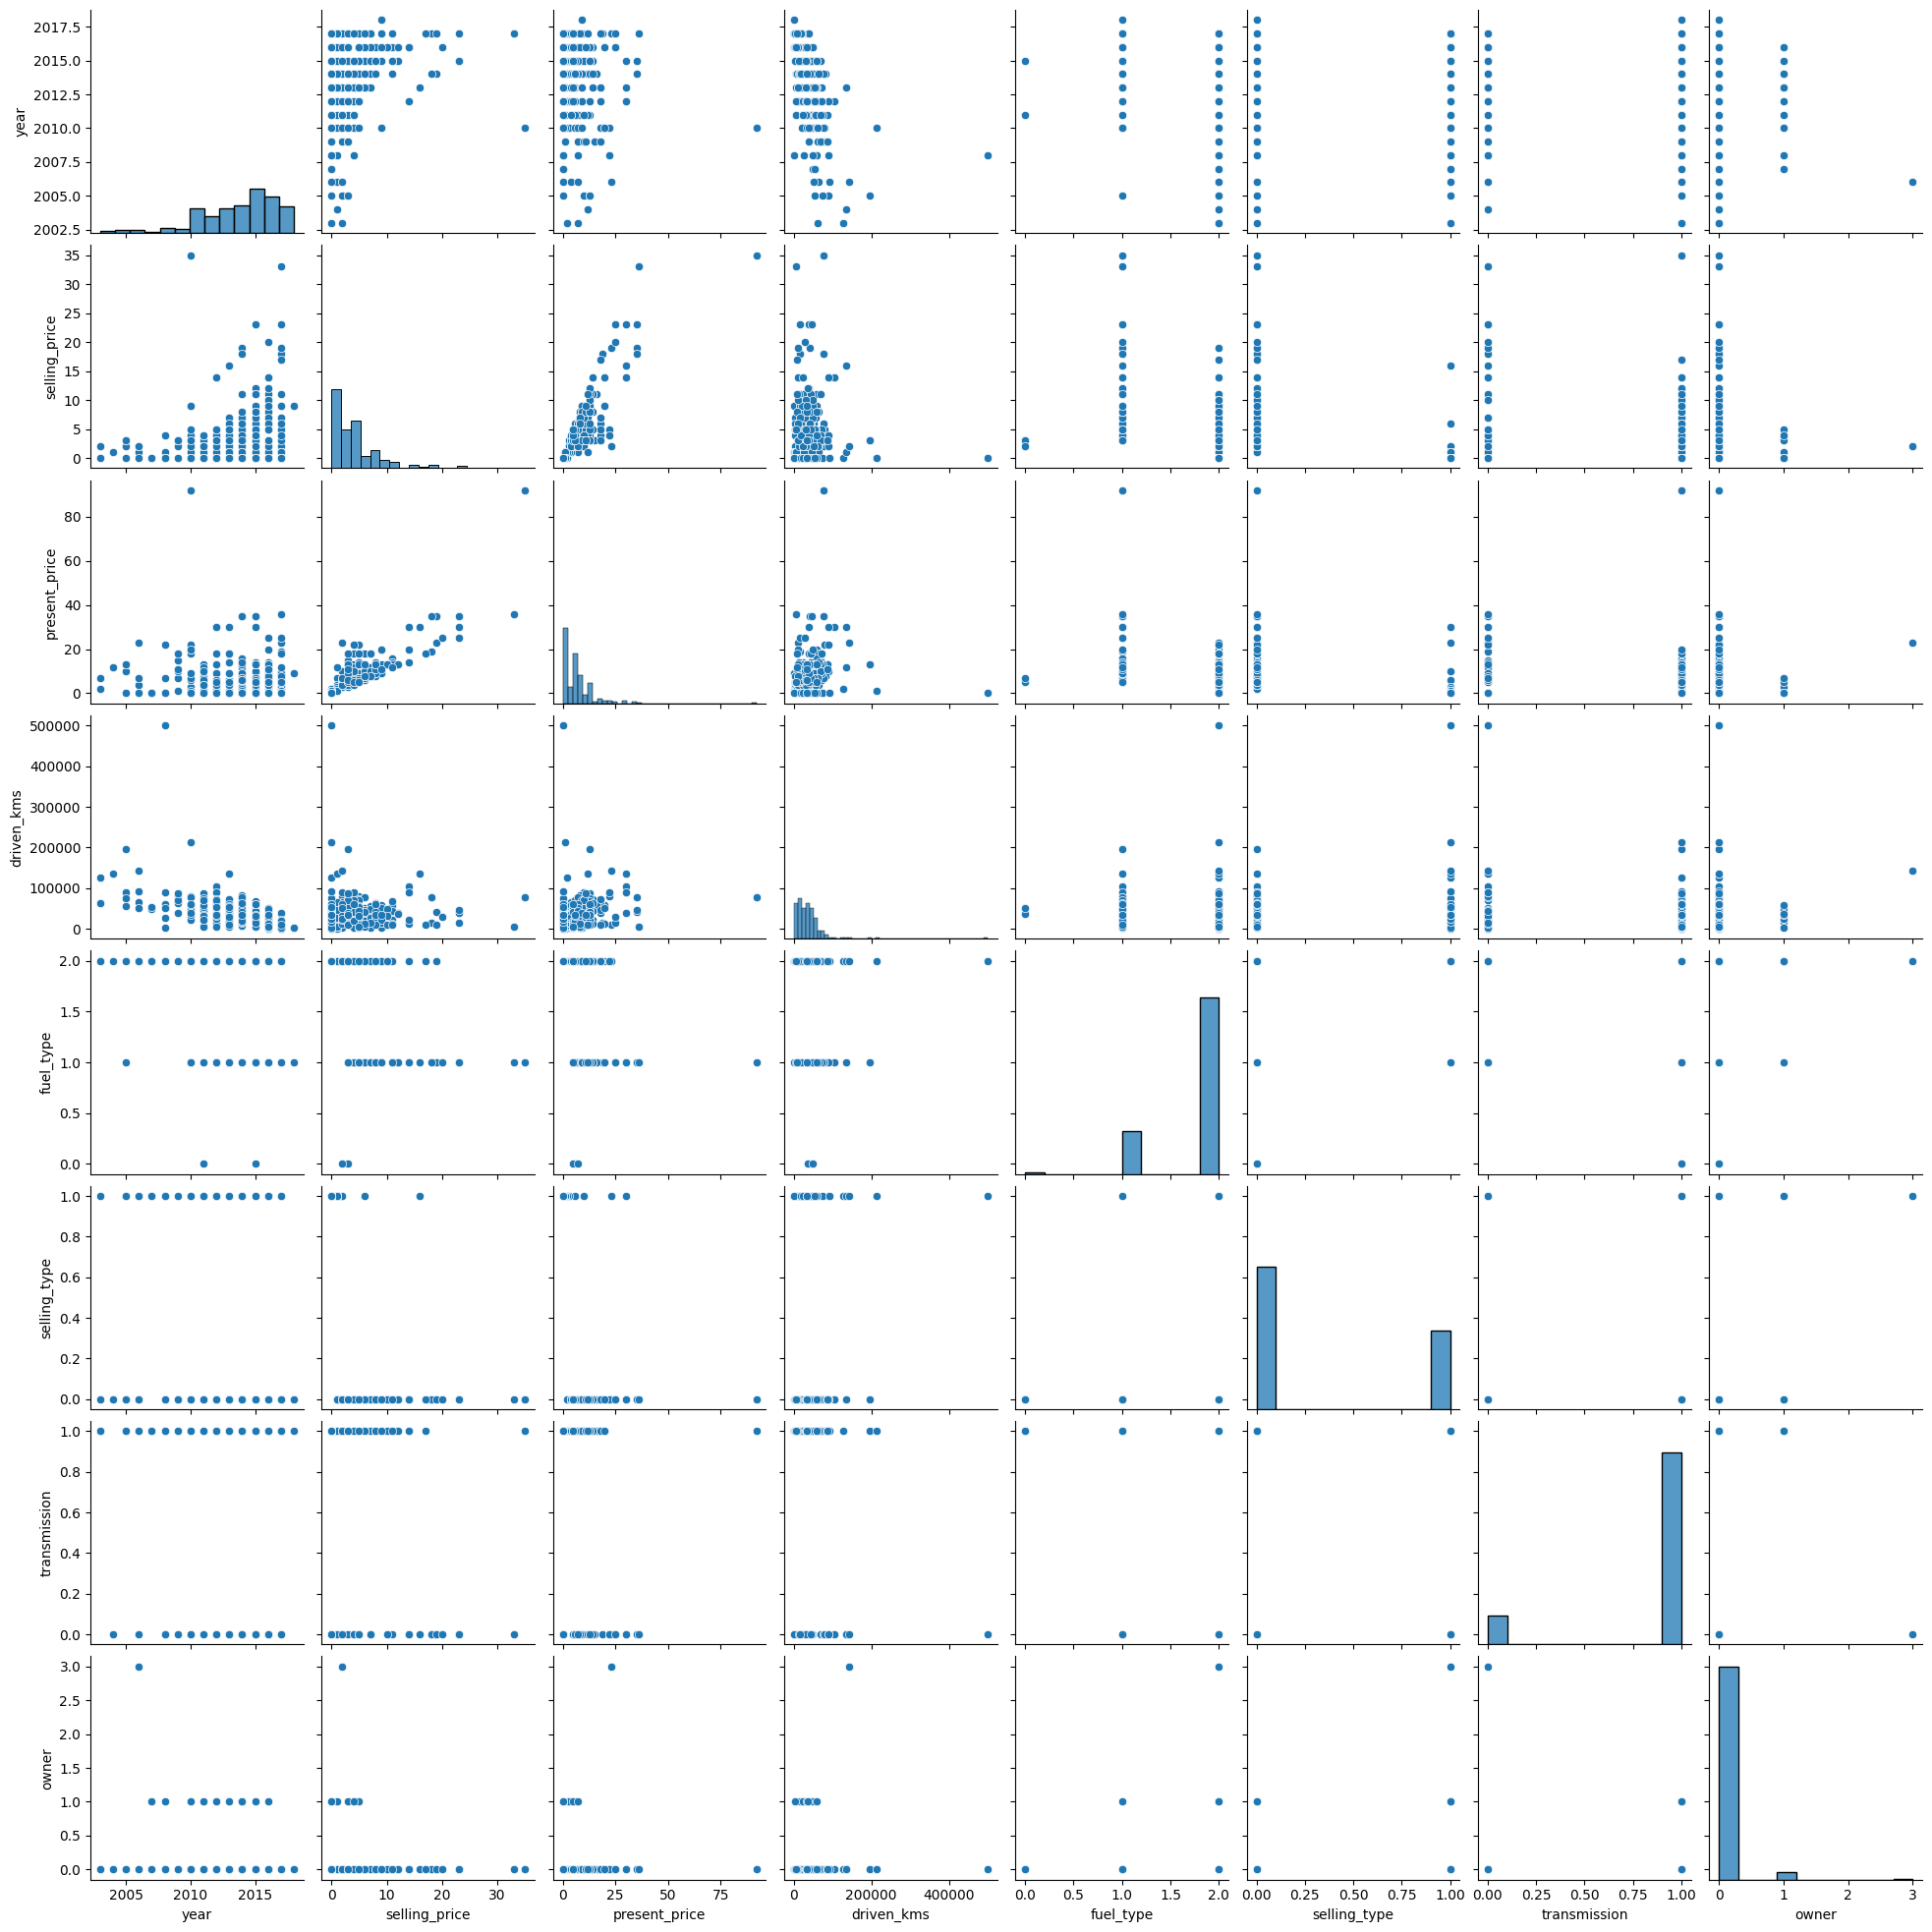

In [81]:
sns.pairplot(data)
plt.show()

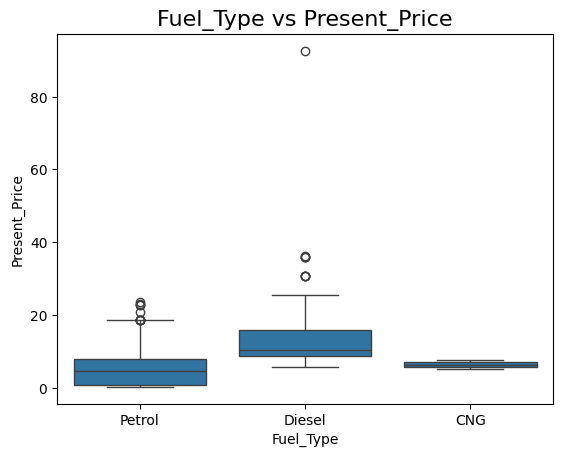

In [49]:
plt.figure()
sns.boxplot(x='fuel_type', y='present_price', data=data)
plt.title('Fuel_Type vs Present_Price', fontsize=16)
plt.xlabel('Fuel_Type')
plt.ylabel('Present_Price')
plt.show()

C:\Users\Rafay Noor\AppData\Local\Temp\ipykernel_6080\3501826918.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_car_models.values, y=top_car_models.index, palette='cividis')


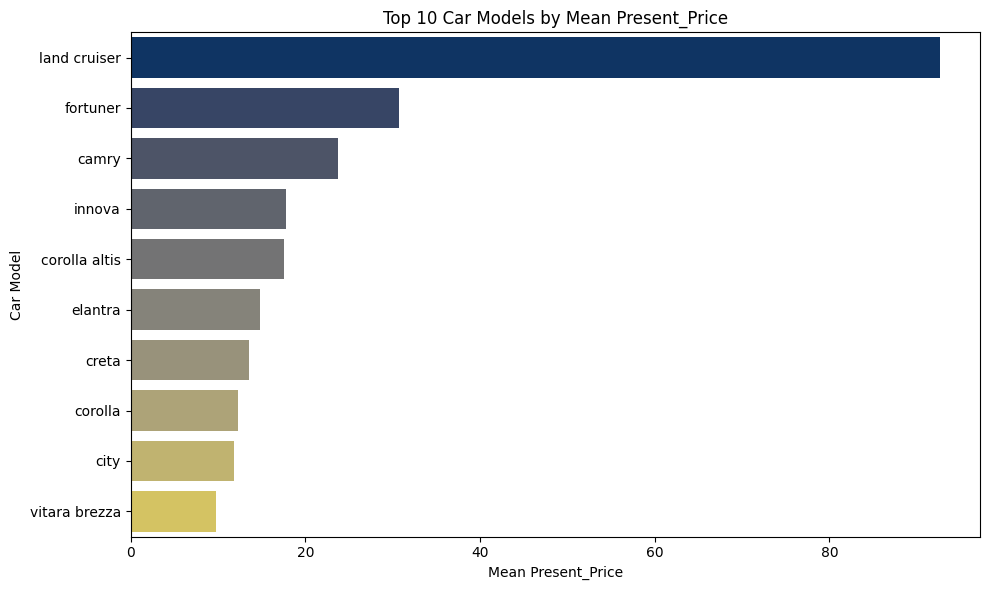

In [58]:
top_car_models = data.groupby('car_name')['present_price'].mean().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index, palette='cividis')
plt.title(f'Top {10} Car Models by Mean Present_Price')
plt.xlabel('Mean Present_Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

### FEATURE ENGINNERING

In [63]:
encoder=LabelEncoder()
data['fuel_type']=encoder.fit_transform(data['fuel_type'])
data['selling_type']=encoder.fit_transform(data['selling_type'])
data['transmission']=encoder.fit_transform(data['transmission'])

In [66]:
data.drop('car_name',axis=1,inplace=True)

In [67]:
data.dtypes

year               int64
selling_price    float64
present_price    float64
driven_kms         int64
fuel_type          int64
selling_type       int64
transmission       int64
owner              int64
dtype: object

In [71]:
data[['selling_price', 'present_price']] = data[['selling_price', 'present_price']].astype(int)


### Model

In [73]:
X=data.drop(['selling_price'],axis=1)
y=data['selling_price']

### TrainTest Split

In [74]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2)

In [75]:
LR=LinearRegression()

In [76]:
LR.fit(X_train, y_train)

LinearRegression()

In [77]:
y_pred=LR.predict(X_test)


In [78]:
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 1.4637872106493737
Mean Squared Error: 6.156591040426641
R-squared: 0.8304436507731577
